# Canny Edge Detector
$p.30 \sim p.53$

1. Gaussian filter
2. Find the intensity gradient of the image

  a. Apply a pair of convolution masks

  ![](https://i.imgur.com/EiYaObX.png)

  b. Find the gradient strength and direction with:

  ![](https://i.imgur.com/U5FEiKe.png)

3. Non-maximum Suppression
4. Thresholding edges
5. Hysteresis: The final step. Canny does use two thresholds (upper and lower):
>If a pixel gradient is higher than the upper threshold, the pixel is accepted as an edge
If a pixel gradient value is below the lower threshold, then it is rejected.
If the pixel gradient is between the two thresholds, then it will be accepted only if it is connected to a pixel that is above the upper threshold.
Canny recommended a upper:lower ratio between 2:1 and 3:1.

[Canny Edge Detector](https://docs.opencv.org/master/da/d5c/tutorial_canny_detector.html)

In [4]:
from google.colab import drive
import os
drive.mount('/content/drive')
# os.chdir('/content/drive/MyDrive/Class')
%cd /content/drive/MyDrive/AI_DIG/HW2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/AI_DIG/HW2


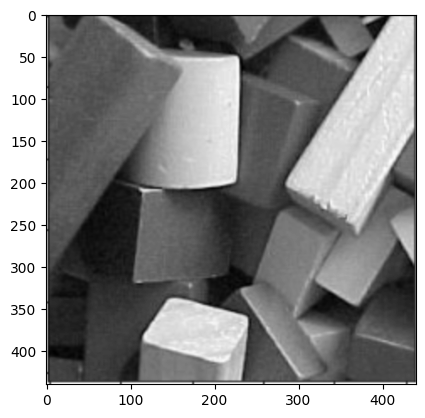

image.shape:  (440, 440)


In [5]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import ndimage

img_org = cv2.imread("blocks.jpg",0)
plt.imshow(img_org ,cmap='gray')
plt.show()
print('image.shape: ', img_org.shape)


In [6]:
np.set_printoptions(threshold=np.inf)

## Step 1. Gaussian filter

Original Image Shape: (440, 440)
Resulting Image Shape: (440, 440)


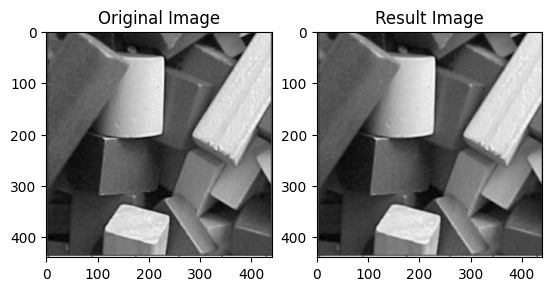

In [7]:
def padding_img(img,p_size,style='edge'):
  # ------------ To do ------------- #
  if style=='constant':
    padded_img = np.pad(img, ((p_size, p_size), (p_size, p_size)), mode=style, constant_values=0)
  else:
    padded_img = np.pad(img, ((p_size, p_size), (p_size, p_size)), mode=style)
  return padded_img

def gaussian_kernel(KernelSize):
  sigma = 0.3*((KernelSize-1)*0.5 - 1) + 0.8
  Gaussian=[]
  #各係數相加後總值
  total=0
  for i in range(0,KernelSize):
      Filter_list = []
      for j in range(0,KernelSize):
        #高斯函數公式
        # -------------- To do ----------------- #
        x, y = i - (KernelSize - 1) / 2, j - (KernelSize - 1) / 2
        exponent = -(x**2 + y**2) / (2 * sigma**2)
        value = math.exp(exponent) / (2 * math.pi * sigma**2)
        Filter_list.append(value)
        total += value
      Gaussian+= [Filter_list]
  #print(Gaussia)
  return np.array(Gaussian)/total

def Convolution(image,Kernel):
  row, col = image.shape
  k_row, k_col = Kernel.shape
  resx = np.zeros((row, col))  # Initialize a result image
  padimg = padding_img(image,(KernelSize-1)//2,style='reflect')

  # ------------ To do ------------- #
  for i in range(row):
    for j in range(col):
      # for k in range(depth):
      # Extract the region of interest (ROI) from the padded image
      roi = padimg[i : i+k_row, j : j+k_col]
      # Perform element-wise multiplication between the ROI and the kernel
      conv = np.sum(roi * Kernel)
      # if i==1:
      #   print(conv)
      # Store the result in the output image
      resx[i, j] = conv
  return resx.astype('int16')

KernelSize = 3
Gaussian_Kernel = gaussian_kernel(KernelSize)
Gaussian_img = Convolution(img_org, Gaussian_Kernel)

print('Original Image Shape:', img_org.shape)
print('Resulting Image Shape:', Gaussian_img.shape)

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(img_org, cmap='gray')
plt.title('Original Image')

# Plot the result of convolution
plt.subplot(1, 2, 2)
plt.imshow(Gaussian_img, cmap='gray')
plt.title('Result Image')

plt.show()

## Step 2. Filter image with derivative of Gaussian
![](https://i.imgur.com/G4e6Z4n.png)

In [8]:

def sobel(img, filtering_type):
  h, w = img.shape

  horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
  vertical = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
  # horizontal = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
  # vertical = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

  Gx = np.zeros((h , w ))
  Gy = np.zeros((h , w ))

  Gx = cv2.filter2D(img, -1, horizontal)
  Gy = cv2.filter2D(img, -1, vertical)
  Gx = np.abs(Gx)
  Gy = np.abs(Gy)
  # Gx = ndimage.convolve(img, horizontal)
  # Gy = ndimage.convolve(img, vertical)
  # Gx = Convolution(img, horizontal)
  # Gy = Convolution(img, vertical)


  # ------------ To do ------------- #
  if filtering_type == 'horizontal':
    output = Gx
    angle = 0
  elif filtering_type == 'vertical':
    output = Gy
    angle = 90
  elif filtering_type == 'gradient':
    Gx_2 =  np.square(Gx)
    Gy_2 =  np.square(Gy)
    output = np.sqrt(Gx_2 + Gy_2)
    angle = np.arctan2(Gy, Gx)
  output = output / output.max() * 255
  # print(Gx.shape)
  # print(Gy.shape)
  return output.astype('int32'), angle


# def iterate_regions(img, kernel_size):
#     h, w = img.shape
#     for i in range(h - kernel_size + 1):
#         for j in range(w - kernel_size + 1):
#             img_region = img[i:(i + kernel_size), j:(j + kernel_size)]
#             yield img_region, i, j



Gaussian Image Shape: (440, 440)
horizontal Image Shape: (440, 440)
vertical Image Shape: (440, 440)
gradient Image Shape: (440, 440)


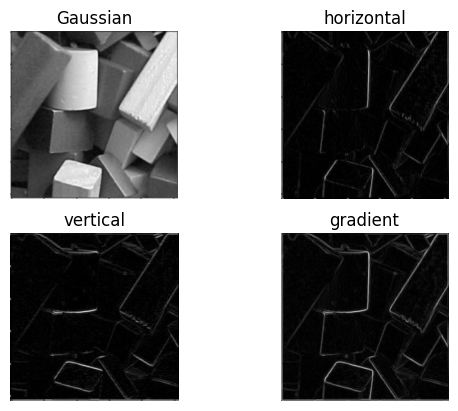

In [9]:
# ------------ To do ------------- #
#need change to floating since it has square and add >8bit
Gaussian_img_float = Gaussian_img.astype('float')

filtering_type = 'horizontal'
horizontal_amp, horizontal_ang = sobel(Gaussian_img_float, filtering_type)
filtering_type = 'vertical'
vertical_amp, vertical_ang = sobel(Gaussian_img_float, filtering_type)
filtering_type = 'gradient'
gradient_amp, gradient_ang = sobel(Gaussian_img_float, filtering_type)

print('Gaussian Image Shape:', Gaussian_img.shape)
print('horizontal Image Shape:', horizontal_amp.shape)
print('vertical Image Shape:', vertical_amp.shape)
print('gradient Image Shape:', gradient_amp.shape)

plt.subplot(2, 2, 1)
plt.imshow(Gaussian_img, cmap='gray')
plt.title('Gaussian')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(horizontal_amp, cmap='gray')
plt.title('horizontal')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(vertical_amp, cmap='gray')
plt.title('vertical')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(gradient_amp, cmap='gray')
plt.title('gradient')
plt.axis('off')

plt.show()

## Step 3. Non-maximum Suppression
Non maximum suppression without interpolation requires us to divide the 3x3 grid of pixels into 8 sections. Ie. if the gradient direction falls in between the angle -22.5 and 22.5, then we use the pixels that fall between this angle (r and q) as the value to compare with pixel p, see image below.

![](https://i.imgur.com/55DLrWn.png)

In [10]:
def non_maximum_suppression(gradient,angle):
  gradient_copy = gradient.copy()
  height,width= gradient.shape
  for j in range(1, height-1):
    for i in range(1, width-1):
      # ------------ To do ------------- #
      # Get the gradient strength of the current pixel
      current_gradient = gradient[j, i]

      # Get the gradient angles in degrees
      current_angle = angle[j, i] * (180 / np.pi)

      # Define the direction of the gradient
      if (0 <= current_angle < 22.5) or (157.5 <= current_angle <= 180):
        # Horizontal direction
        neighbor1 = gradient[j, i + 1]
        neighbor2 = gradient[j, i - 1]
      elif (22.5 <= current_angle < 67.5):
        # Diagonal direction (bottom-right to top-left)
        neighbor1 = gradient[j - 1, i + 1]
        neighbor2 = gradient[j + 1, i - 1]
      elif (67.5 <= current_angle < 112.5):
        # Vertical direction
        neighbor1 = gradient[j + 1, i]
        neighbor2 = gradient[j - 1, i]
      else:  # 112.5 <= current_angle < 157.5
        # Diagonal direction (bottom-left to top-right)
        neighbor1 = gradient[j - 1, i - 1]
        neighbor2 = gradient[j + 1, i + 1]

      # Perform non-maximum suppression
      if current_gradient < neighbor1 or current_gradient < neighbor2:
          gradient_copy[j, i] = 0  # Suppress non-maximum
  return gradient_copy

gradient,angle = sobel(Gaussian_img_float, 'gradient')
After_non_maximum_supression = non_maximum_suppression(gradient,angle)


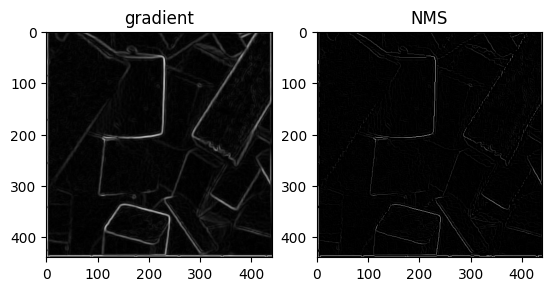

In [11]:
# ------------ To do ------------- #
# Plot the result of convolution
plt.subplot(1, 2, 1)
plt.imshow(gradient_amp, cmap='gray')
plt.title('gradient')
# Plot the result of convolution
plt.subplot(1, 2, 2)
plt.imshow(After_non_maximum_supression, cmap='gray')
plt.title('NMS')

plt.show()

## Step 4. Thresholding edges

In [12]:
def seperate(img, minimum = 60, maximum = 180):
  # ------------ To do ------------- #
  h,w = img.shape[0],img.shape[1]
  thresholding = np.zeros((h,w))
  for i in range(h):
    for j in range(w):
      if img[i][j] > maximum:
        thresholding[i][j] = 255
      elif (minimum<= img[i][j] <= maximum):
        thresholding[i][j] = 30
      else:
        thresholding[i][j] = 0
  return thresholding

thresholding = seperate(After_non_maximum_supression, minimum = 15, maximum = 30)

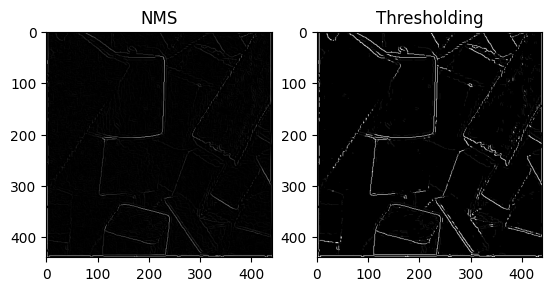

In [13]:
# ------------ To do ------------- #
# Plot the result of convolution
plt.subplot(1, 2, 1)
plt.imshow(After_non_maximum_supression, cmap='gray')
plt.title('NMS')
# Plot the result of convolution
plt.subplot(1, 2, 2)
plt.imshow(thresholding, cmap='gray')
plt.title('Thresholding')

plt.show()

## Step 5. Hysteresis

In [14]:
def Connect(img,weak=125,strong=255):
  # ------------ To do ------------- #
  height, width = img.shape
  output = img.copy()

  # Define 8-connectivity neighbors
  neighbors = [(1, 0), (-1, 0), (0, 1), (0, -1), (1, 1), (-1, -1), (1, -1), (-1, 1)]

  for y in range(height):
    for x in range(width):
      if (img[y,x] == weak):
        for dy, dx in neighbors:
          ny, nx = y + dy, x + dx
          if 0 <= ny < height and 0 <= nx < width and img[ny,nx]==strong:
            output[y,x] = strong

      if (output[y,x] == weak):
        output[y,x] = 0
  return output

weak = 30
strong = 255
thresholding_int = thresholding.astype('uint8')
canny_img = Connect(thresholding_int,weak,strong)


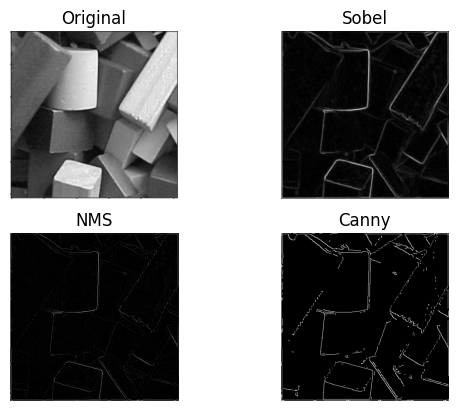

In [15]:
# ------------ To do ------------- #
plt.subplot(2, 2, 1)
plt.imshow(img_org, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(gradient_amp, cmap='gray')
plt.title('Sobel')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(After_non_maximum_supression, cmap='gray')
plt.title('NMS')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(canny_img, cmap='gray')
plt.title('Canny')
plt.axis('off')

plt.show()

## Canny Edge OpenCV 套件


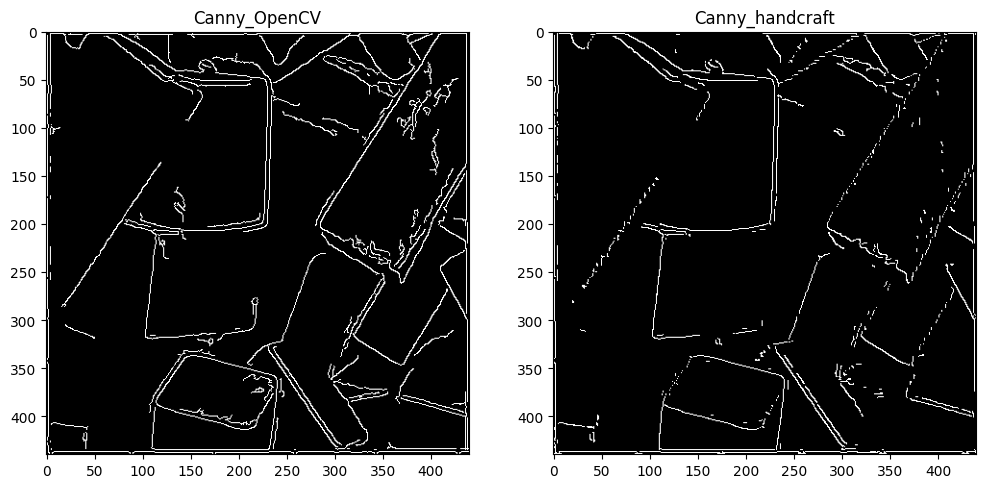

In [16]:
low_threshold = 15
high_threshold = 90
kernel_size = 3
#這邊較低的threshold用於檢測圖像中明顯的邊緣，較高的threshold則將間斷的邊緣連接起來。
img2 = cv2.imread("blocks.jpg",0)
gray_blur = cv2.GaussianBlur(img2,(kernel_size, kernel_size),0)
edges = cv2.Canny(gray_blur, low_threshold, high_threshold)

plt.figure(figsize=(12,24))
plt.subplot(1, 2, 1)
plt.imshow(edges, cmap='Greys_r')
plt.title('Canny_OpenCV')

plt.subplot(1, 2, 2)
plt.imshow(canny_img, cmap='Greys_r')
plt.title('Canny_handcraft')

plt.show()

## 加分討論：為什麼和套件不一樣？

因為自己設計的演算法要一直調參數，可能找還找不到可以接受的效果，而且我設計的非極大直抑制會砍掉很多邊，造成還要用Thresholding去補救。而OpenCV的演算法可能並不只有這五個步驟，而且參數也會經過大量圖像訓練選出最好的結果。

# 加分題目 : Dilation (膨脹) & Erosion (侵蝕)

## Dilation (膨脹)

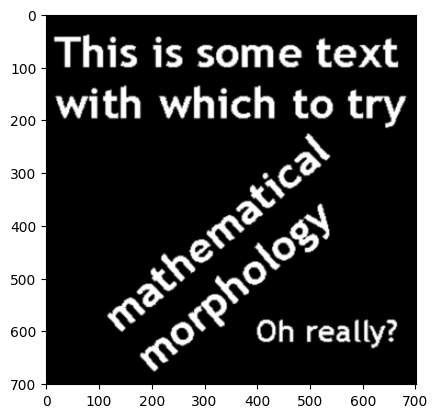

image.shape:  (701, 702)


In [21]:
img = cv2.imread("Dilation_Erosion.jpg",0)
plt.imshow(img ,cmap='gray')
plt.show()
print('image.shape: ', img.shape)

In [22]:
def get_kernel(kernel_type, kernel_size=3):
  if kernel_type == 'dilation':
    return np.ones((kernel_size, kernel_size), dtype=np.uint8)
  elif kernel_type == 'erosion':
    return np.ones((kernel_size, kernel_size), dtype=np.uint8)

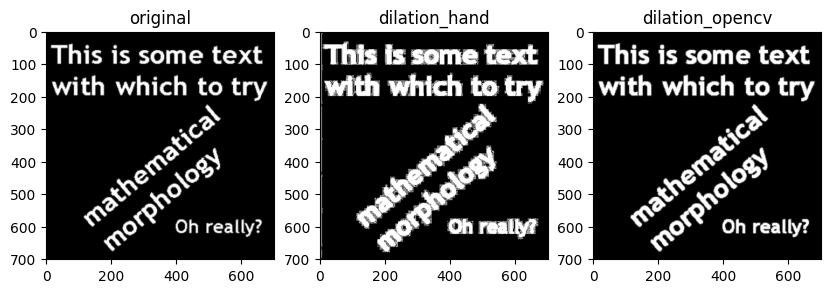

original shape:  (440, 440)
dilation_hand shape:  (701, 702)
dilation_opencv shape:  (701, 702)


In [37]:
def Dilation(img, kernel):
  row, col = img.shape
  dilation_img = np.zeros((row, col))
  kernelsize = kernel.shape[0]
  img = padding_img(img, (kernelsize-1)//2)

  # -------- To do ------------- #
  for i in range(row):
    for j in range(col):
      # Extract the neighborhood of the current pixel
      neighborhood = img[i:i+kernelsize, j:j+kernelsize]

      # Check if the neighborhood is covered by the kernel
      if np.sum(neighborhood * kernel) > 0:
        dilation_img[i, j] = 255
  return dilation_img

#hand
res = Dilation(img, get_kernel('dilation', kernel_size = 1))
#openCV
img_dilation = cv2.dilate(img, get_kernel('dilation', kernel_size = 3), iterations=1)

plt.figure(figsize=(10,20))
plt.subplot(1,3,1)
plt.title('original')
plt.imshow(img, cmap = 'gray')
plt.subplot(1,3,2)
plt.title('dilation_hand')
plt.imshow(res, cmap = 'gray')
plt.subplot(1,3,3)
plt.title('dilation_opencv')
plt.imshow(img_dilation, cmap = 'gray')
plt.show()

print('original shape: ', img_org.shape)
print('dilation_hand shape: ', res.shape)
print('dilation_opencv shape: ', img_dilation.shape)

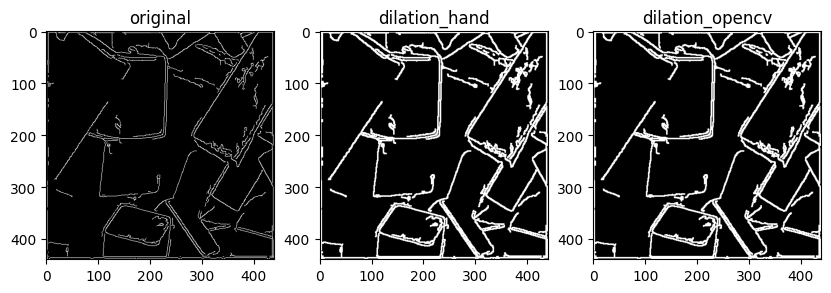

original shape:  (440, 440)
dilation_hand shape:  (440, 440)
dilation_opencv shape:  (440, 440)


In [34]:
#hand
res = Dilation(edges, get_kernel('dilation', kernel_size = 3))
#openCV
img_dilation = cv2.dilate(edges, get_kernel('dilation', kernel_size = 3), iterations=1)

plt.figure(figsize=(10,20))
plt.subplot(1,3,1)
plt.title('original')
plt.imshow(edges, cmap = 'gray')
plt.subplot(1,3,2)
plt.title('dilation_hand')
plt.imshow(res, cmap = 'gray')
plt.subplot(1,3,3)
plt.title('dilation_opencv')
plt.imshow(img_dilation, cmap = 'gray')
plt.show()

print('original shape: ', img_org.shape)
print('dilation_hand shape: ', res.shape)
print('dilation_opencv shape: ', img_dilation.shape)

## Erosion (侵蝕)

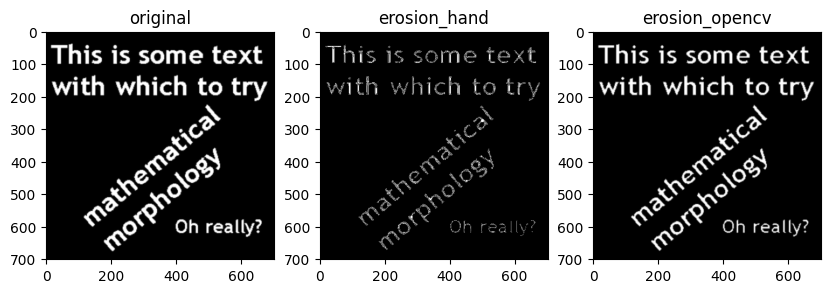

original shape:  (701, 702)
erosion_hand shape:  (701, 702)
erosion_opencv shape:  (701, 702)


In [32]:
def Erosion(img, kernel):
  row, col = img.shape
  erosion_img = np.zeros((row, col))
  kernelsize = kernel.shape[0]
  img = padding_img(img, (kernelsize-1)//2)

  # -------- To do ------------- #
  for i in range(row):
    for j in range(col):
      # Extract the neighborhood of the current pixel
      neighborhood = img[i:i+kernelsize, j:j+kernelsize]

      # Check if the neighborhood is covered by the kernel
      if np.all(neighborhood == 255):
        erosion_img[i, j] = 255
  # ------------------------------- #
  return erosion_img

#hand
res = Erosion(img, get_kernel('erosion', kernel_size = 1))
#openCV
img_erosion = cv2.erode(img, get_kernel('erosion', kernel_size = 3), iterations=1)


plt.figure(figsize=(10,20))
plt.subplot(1,3,1)
plt.title('original')
plt.imshow(img, cmap = 'gray')
plt.subplot(1,3,2)
plt.title('erosion_hand')
plt.imshow(res, cmap = 'gray')
plt.subplot(1,3,3)
plt.title('erosion_opencv')
plt.imshow(img_erosion, cmap = 'gray')
plt.show()

print('original shape: ', img.shape)
print('erosion_hand shape: ', res.shape)
print('erosion_opencv shape: ', img_erosion.shape)

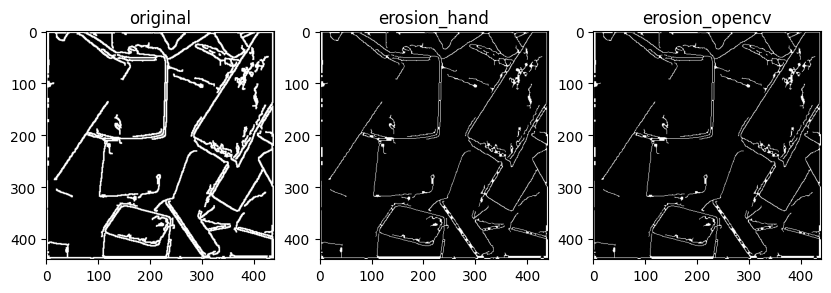

original shape:  (440, 440)
erosion_hand shape:  (440, 440)
erosion_opencv shape:  (440, 440)


In [35]:
#hand
res = Erosion(img_dilation, get_kernel('erosion', kernel_size = 3))
#openCV
img_erosion = cv2.erode(img_dilation, get_kernel('erosion', kernel_size = 3), iterations=1)


plt.figure(figsize=(10,20))
plt.subplot(1,3,1)
plt.title('original')
plt.imshow(img_dilation, cmap = 'gray')
plt.subplot(1,3,2)
plt.title('erosion_hand')
plt.imshow(res, cmap = 'gray')
plt.subplot(1,3,3)
plt.title('erosion_opencv')
plt.imshow(img_erosion, cmap = 'gray')
plt.show()

print('original shape: ', img_dilation.shape)
print('erosion_hand shape: ', res.shape)
print('erosion_opencv shape: ', img_erosion.shape)

# 說明

自己做的Dilation & Erosion function於細的contour表現會來的比粗的還好，可能的原因為kernel的設計過於簡單了，導致在較粗的contour在Dilation & Erosion會有些髒髒的noise。